In [1]:
# HIDDEN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from matplotlib import patches
from datascience import *
%matplotlib inline
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# An Empirical Demand Curve

Let's examine some historical data on non-organic avocado prices and sales volumes in San Francisco from 2015 to 2018. The original dataset is taken from Kaggle and can be found here:[Kaggle Dataset on Avocado Prices](https://www.kaggle.com/neuromusic/avocado-prices).


In [2]:
avocados = Table.read_table("avocados.csv") # is it avocados or avocadoes?
avocados

Date,Average Price,Total Volume
2015-12-27,1.05,692206
2015-12-20,1.15,637091
2015-12-13,1.22,616016
2015-12-06,1.06,694982
2015-11-29,1.05,651639
2015-11-22,1.04,709444
2015-11-15,0.99,775849
2015-11-08,1.4,599884
2015-11-01,0.97,869927
2015-10-25,1.55,561342


## Visualizing the Relationship between Price and Quantity

To construct the demand curve, let's first see what the relationship between price and quantity is. We would expect to see a downward-sloping line between price and quantity; if a product's price increases, consumers will purchase less, and if a product's price decreases, then consumers will purchase more. 

To find this, we will create a scatterplot and draw a regression line (by setting `fit_line = True` in the `tbl.scatter` call) between the points. Regression lines are helpful because they consolidate all the datapoints into a single line, helping us better understand the relationship between the two variables. 

[Following image is a scatter plot of a demand curve for Avocados]

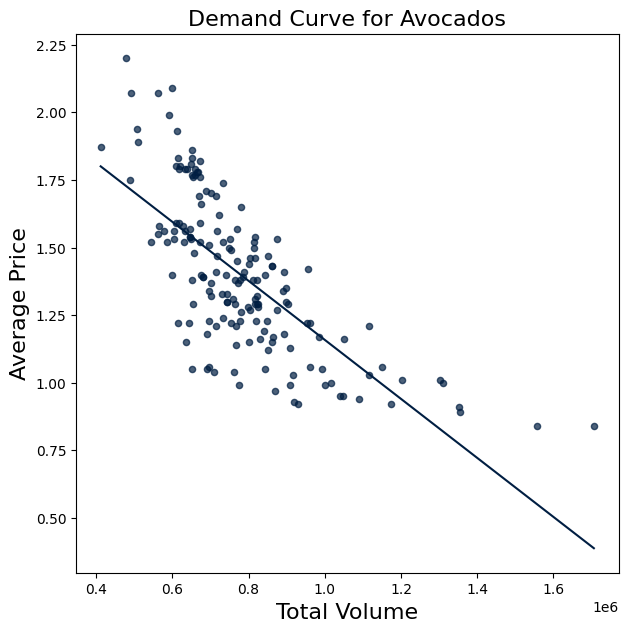

In [3]:
avocados.scatter("Total Volume", "Average Price", fit_line = True, width = 7, height = 7)
plt.title("Demand Curve for Avocados", fontsize = 16);

The visualization shows a negative relationship between quantity and price, which is exactly what we expected! As we've discussed, as the price increases, fewer consumers will purchase avocados, so the quantity demanded will decrease. This corresponds to a leftward movement along the demand curve. Alternatively, as the price decreases, the quantity sold will increase because consumers want to maximize their purchasing power and buy more avocados; this is shown by a rightward movement along the curve.


As a quick refresher, scatterplots can show positive, negative, or neutral correlations among two variables: 
- If two variables have a positive correlation, then as one variable increases, the other increases too. 
- If two variables have a negative correlation, then as one variable increases, the other decreases. 
- If two variables have a neutral correlation, then if one varible increases, the other variable is unaffected. 

Note that scatterplots do not show or prove causation between two variables-- it is up to the data scientists to prove any causation. 

## Fitting a Linear Demand Curve

We will now quantify our demand curve using NumPy's [`np.polyfit` function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). `np.polyfit` returns an array of size 2, where the first element is the slope and the second is the $y$-intercept.

It takes 3 parameters:
- array of x-coordinates
- array of y-coordinates
- degree of polynomial 

Because we are looking for a **linear** function to serve as the demand curve, we will use 1 for the degree of polynomial. 

The general template for the demand curve is $y = mx + b$, where $m$ is the slope and $b$ is $y$-intercept. 

### Demand with Price as a Function of Quantity

First, we will fit a demand curve expressed in terms of price as a function of quantity. This aligns with the axes of supply and demand curves, in which the quantity is on the x-axis and price is on the y-axis:

$$P(Q) = m\cdot Q + b$$

In [4]:
slope, intercept = np.polyfit(avocados.column("Total Volume"), avocados.column("Average Price"), 1)
print("The slope is:", slope)
print("The intercept is:", intercept)

The slope is: -1.09092696598e-06
The intercept is: 2.24953041226


Thus, our demand curve is $P(Q) = -0.00000109Q+ 2.2495$; The slope is -0.00000109 and $y$-intercept is 2.2495. This means that as the quantity demanded increases by 1 unit (in this case, 1 avocado), we would expect to see price to decrease by 0.00000109 units. 

We can plot this line on a graph. Notice that it is the same line as the one when we indicated `fit_line=True` above.

[Following image is a scatter plot of a demand curve for Avocados]

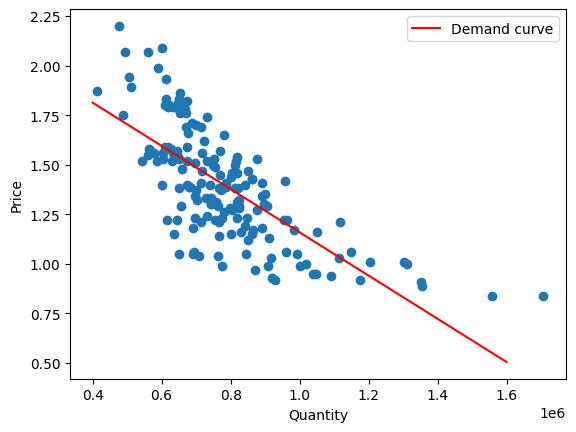

In [5]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
quantities = np.arange(400000, 1600000, 1000)
predicted_prices = slope * quantities + intercept
plt.plot(quantities, predicted_prices, color = 'red', label = "Demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

### Demand with Quantity as a Function of Price

Our interpretation of the demand curve and its slope above was probably not quite intuitive: changes in quantity demanded likely do not trigger changes in price, but instead it is the other way around. In addition, the slope was tiny: the marginal increase of one additional avocado sold had very little effect from the change in price. 

Thus, it is more intuitive to think the effect a one dollar change in price has on the quantity demanded, and to flip our axes:

$$D(P) = Q(P) = m\cdot P + b$$

In this course, we will write $Q(P)$ and $D(P)$ fairly interchangeably when referencing demand.

One key thing to remember: our axes are flipped for this demand curve! If you want to plot it, note that the left hand side (dependent variable) is actually the x-axis variable, while the independent variable is the y-axis variable.

Fitting our data using this function, we get:

In [6]:
slope, intercept = np.polyfit(avocados.column("Average Price"), avocados.column("Total Volume"), 1)
print("The slope is:", slope)
print("The intercept is:", intercept)

The slope is: -476412.718982
The intercept is: 1446951.64081


Here, our demand curve is roughly $Q(P) = -476413P+ 1446952$; the slope is -476413 and $y$-intercept is 1446952. This means that as the price increases by 1 unit (in this case, \$1), we would expect to see quantity demanded to decrease by 476413 units (in this case, 476413 avocados). 

Note that this demand curve is not the same as the previous demand curve! It is not simply the inverse of the previous demand curve.

Plotting this line on a graph, we see a slightly different demand curve: can you see what is different between the two?

[Following image is a scatter plot and fit line of a demand curve for Avocados]

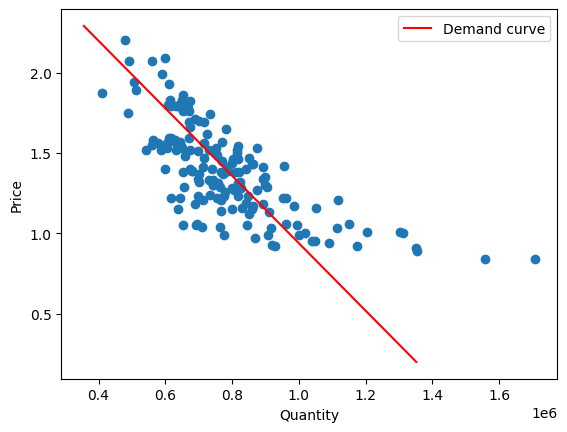

In [7]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
prices = np.arange(0.2, 2.3, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();